#Research Question

###Is there a pattern between Education and Employment according to gender? 

Source: Gender Statistics from The World Bank.

##1.1 Reducing the dataset to a smaller size to host on github

The file I downloaded from World Bank is 65mb, which was too big to host on github. So I reduced it and exported a new csv file to host. I'll leave the code here but turn it off.

In [1]:
##Conditions used in this project

# condition = (df['Country Code']=='ARB')

# condition_schooling_male = (df['Indicator Code'] == df.loc[117, 'Indicator Code'])

# condition_employment_female = (df['Indicator Code'] == df.loc[103, 'Indicator Code'])
# condition_employment_male = (df['Indicator Code'] == df.loc[105, 'Indicator Code'])

# df_reduced = df[condition | condition_schooling_female | condition_schooling_male | condition_employment_female | condition_employment_male]
# df = df_reduced

In [2]:
# #Save dataframe to a csv file

# compression_opts = dict(method='zip', archive_name='out.csv')
# df.to_csv('Gender_StatsData_temsy.zip', compression=compression_opts)

#2.1 Data Exploration

In [3]:
#Code libraries used 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


#Widen the display options so I can see everything
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 200)

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/TemsyChen/Lambda_Unit1_Build/main/Gender_StatsData_temsy.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Arab World,ARB,A woman can apply for a passport in the same way as a man (1=yes; 0=no),SG.APL.PSPT.EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,A woman can be head of household in the same way as a man (1=yes; 0=no),SG.HLD.HEAD.EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,A woman can choose where to live in the same way as a man (1=yes; 0=no),SG.LOC.LIVE.EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,A woman can get a job in the same way as a man (1=yes; 0=no),SG.GET.JOBS.EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no),SG.OBT.DVRC.EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,Zambia,ZMB,"Expected years of schooling, male",SE.SCH.LIFE.MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.50907,NaN,NaN,NaN,7.95839,NaN,NaN,NaN,NaN,8.04369,NaN,7.98882,8.06481,NaN,NaN,NaN,NaN,NaN,8.48456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1668,Zimbabwe,ZWE,"Employment to population ratio, 15+, female (%) (modeled ILO estimate)",SL.EMP.TOTL.SP.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.836998,71.889999,71.803001,71.736000,71.276001,70.647003,70.067001,68.866997,67.539001,68.763000,70.059998,71.275002,72.454002,73.621002,73.489998,73.464996,73.452003,73.391998,72.986,72.810997,72.797997,72.879997,73.004997,73.130997,73.250999,73.373001,73.503998,73.646004,73.843002,73.860001,NaN
1669,Zimbabwe,ZWE,"Employment to population ratio, 15+, male (%) (modeled ILO estimate)",SL.EMP.TOTL.SP.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.247002,85.035004,84.625999,84.150002,83.194000,82.303001,81.497002,81.422997,80.986000,81.711998,82.535004,83.191002,83.820000,84.472000,84.349998,84.447998,84.528999,84.545998,84.445,84.356003,84.347000,84.453003,84.649002,84.878998,84.987000,85.142998,85.138000,84.960999,85.047997,84.994003,NaN
1670,Zimbabwe,ZWE,"Expected years of schooling, female",SE.SCH.LIFE.FE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.66279,10.18352,NaN,10.497

In [5]:
#Check out how many NaN values are in this dataset

df.isnull().sum()

#Majority of the values are NaN

Country Name         0
Country Code         0
Indicator Name       0
Indicator Code       0
1960              1654
1961              1654
1962              1653
1963              1654
1964              1654
1965              1654
1966              1654
1967              1653
1968              1652
1969              1652
1970              1507
1971              1399
1972              1400
1973              1414
1974              1424
1975              1413
1976              1404
1977              1392
1978              1401
1979              1390
1980              1383
1981              1395
1982              1386
1983              1386
1984              1368
1985              1374
1986              1370
1987              1381
1988              1396
1989              1388
1990              1355
1991               878
1992               879
1993               856
1994               862
1995               857
1996               866
1997               896
1998               875
1999       

In [6]:
#In order to read the 624 questions that's asked of each country,
#I'll create a subset of just one country

condition = (df['Country Code']=='ARB')
df_subset_ARB = df[condition]
df_subset_ARB.head(20)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Arab World,ARB,A woman can apply for a passport in the same way as a man (1=yes; 0=no),SG.APL.PSPT.EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,A woman can be head of household in the same way as a man (1=yes; 0=no),SG.HLD.HEAD.EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,A woman can choose where to live in the same way as a man (1=yes; 0=no),SG.LOC.LIVE.EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,A woman can get a job in the same way as a man (1=yes; 0=no),SG.GET.JOBS.EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no),SG.OBT.DVRC.EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,A woman can open a bank account in the same way as a man (1=yes; 0=no),SG.OPN.BANK.EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,A woman can register a business in the same way as a man (1=yes; 0=no),SG.BUS.REGT.EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,A woman can sign a contract in the same way as a man (1=yes; 0=no),SG.CNT.SIGN.EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Arab World,ARB,A woman can travel outside her home in the same way as a man (1=yes; 0=no),SG.HME.TRVL.EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Arab World,ARB,A woman can travel outside the country in the same way as a man (1=yes; 0=no),SG.CTR.TRVL.EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Display only "Indicator Name", which has the questions I'm interested in choosing from
#Display only 100 rows at a time for easy handling

df_subset_ARB_test = df_subset_ARB['Indicator Name']
df_subset_ARB_test.head(100)

0                                                     A woman can apply for a passport in the same way as a man (1=yes; 0=no)
1                                                     A woman can be head of household in the same way as a man (1=yes; 0=no)
2                                                     A woman can choose where to live in the same way as a man (1=yes; 0=no)
3                                                                A woman can get a job in the same way as a man (1=yes; 0=no)
4                                             A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)
5                                                      A woman can open a bank account in the same way as a man (1=yes; 0=no)
6                                                      A woman can register a business in the same way as a man (1=yes; 0=no)
7                                                          A woman can sign a contract in the same way as a man (1=yes

In [8]:
df_subset_ARB_test[100:200]

100                                                  Employment in industry, male (% of male employment) (modeled ILO estimate)
101                                              Employment in services, female (% of female employment) (modeled ILO estimate)
102                                                  Employment in services, male (% of male employment) (modeled ILO estimate)
103                                                      Employment to population ratio, 15+, female (%) (modeled ILO estimate)
104                                                         Employment to population ratio, 15+, female (%) (national estimate)
105                                                        Employment to population ratio, 15+, male (%) (modeled ILO estimate)
106                                                           Employment to population ratio, 15+, male (%) (national estimate)
107                                                          Employment to population ratio, 15+, total 

In [9]:
df_subset_ARB_test[200:300]

200                                                    Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)
201                                         Labor force with advanced education, female (% of female working-age population with advanced education)
202                                             Labor force with advanced education, male (% of male working-age population with advanced education)
203                                               Labor force with basic education, female (% of female working-age population with basic education)
204                                                   Labor force with basic education, male (% of male working-age population with basic education)
205                                 Labor force with intermediate education, female (% of female working-age population with intermediate education)
206                                     Labor force with intermediate education, male (% of male working-a

In [10]:
df_subset_ARB_test[300:400]

300                                                                                       Mobile money account, male  (% age 15+)
301                                          Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%)
302                                            Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, male (%)
303    Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population)
304        Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population)
305                                  Mortality rate attributed to unintentional poisoning, female (per 100,000 female population)
306                                      Mortality rate attributed to unintentional poisoning, male (per 100,000 male population)
307                                                                        Mortality rate,

In [11]:
df_subset_ARB_test[400:500]

400                                                                     School enrollment, primary and secondary (gross), gender parity index (GPI)
401                                                                                                    School enrollment, primary, female (% gross)
402                                                                                                      School enrollment, primary, female (% net)
403                                                                                                      School enrollment, primary, male (% gross)
404                                                                                                        School enrollment, primary, male (% net)
405                                                                                 School enrollment, secondary (gross), gender parity index (GPI)
406                                                                                                  School enro

In [12]:
df_subset_ARB_test[500:600]

500                                                Women who believe a husband is justified in beating his wife (any of five reasons) (%): Q2
501                                                Women who believe a husband is justified in beating his wife (any of five reasons) (%): Q3
502                                                Women who believe a husband is justified in beating his wife (any of five reasons) (%): Q4
503                                      Women who believe a husband is justified in beating his wife (any of five reasons) (%): Q5 (highest)
504                                                 Women who believe a husband is justified in beating his wife when she argues with him (%)
505                                    Women who believe a husband is justified in beating his wife when she argues with him (%): Q1 (lowest)
506                                             Women who believe a husband is justified in beating his wife when she argues with him (%): Q2
507   

In [13]:
df_subset_ARB_test[600:]

600                                                           Women who own land alone (% of women age 15-49)
601                                              Women who own land alone (% of women age 15-49): Q1 (lowest)
602                                                       Women who own land alone (% of women age 15-49): Q2
603                                                       Women who own land alone (% of women age 15-49): Q3
604                                                       Women who own land alone (% of women age 15-49): Q4
605                                             Women who own land alone (% of women age 15-49): Q5 (highest)
606                                          Women who own land both alone and jointly (% of women age 15-49)
607                             Women who own land both alone and jointly (% of women age 15-49): Q1 (lowest)
608                                      Women who own land both alone and jointly (% of women age 15-49): Q2
609       

From this first exploration, I've collected the questions that I'm interested in, and what rows they appear on. Later I can use the Indicator Code for these questions to find them for a specific country, or all the countries.


#1.2 Data Exploration: choosing a subject

After going down many different unfruitful paths, I finally hit on something:

**Expected Years of School**: the number of years during which a 2-year-old child can expect to spend in schooling, based on the school enrolment rates at a given date. These expected years are calculated as the sum of enrollment rates observed at the different ages from 2 to 29 years old

This is the exploration that focused on this question.

In [14]:
#Create a subset of each country's response to this question
# row 116 Expected years of schooling, female
# row 117 Expected years of schooling, male

condition_schooling_female = (df['Indicator Code'] == df.loc[116, 'Indicator Code'])
condition_schooling_male = (df['Indicator Code'] == df.loc[117, 'Indicator Code'])

df_school_f = df[condition_schooling_female]
df_school_m = df[condition_schooling_male]

In [15]:
df_school_m.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
117,Arab World,ARB,"Expected years of schooling, male",SE.SCH.LIFE.MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.29777,7.28083,7.4478,7.64669,7.75411,8.00014,8.25342,8.46423,8.61451,8.74143,8.86497,8.93093,9.05160,9.15945,9.28166,9.37740,9.52095,9.65031,9.69344,9.57664,9.51610,9.52028,9.26423,9.35845,9.68432,9.54763,9.77793,9.82504,9.91144,10.06484,10.11681,10.19984,10.30809,10.38155,10.56625,10.81452,10.82611,10.88287,10.92236,11.01001,11.12554,11.23887,11.51240,11.48895,11.57728,11.67828,11.71027,11.82046,11.90156,NaN,NaN,NaN
627,Caribbean small states,CSS,"Expected years of schooling, male",SE.SCH.LIFE.MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.72114,10.63143,10.7653,10.35593,10.39248,10.63220,10.72197,10.97477,11.06747,11.16828,11.13736,10.86385,10.99648,10.99295,10.90829,11.00608,11.10738,11.32671,11.48618,11.46107,11.45638,11.46982,11.53330,11.48986,11.57904,11.53676,11.51066,11.50675,11.49157,11.43243,11.30545,11.35973,11.47502,11.57454,11.90638,11.81857,11.94696,12.07508,12.53681,12.40116,12.19314,12.21079,12.18965,11.96206,11.96243,12.01034,12.17730,NaN,NaN,NaN,NaN,NaN


In [16]:
df_school_m.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              263
1961              263
1962              263
1963              263
1964              263
1965              263
1966              263
1967              263
1968              263
1969              263
1970              203
1971              149
1972              150
1973              158
1974              164
1975              160
1976              156
1977              153
1978              158
1979              152
1980              151
1981              156
1982              152
1983              152
1984              143
1985              148
1986              144
1987              150
1988              157
1989              153
1990              155
1991              157
1992              158
1993              146
1994              150
1995              150
1996              152
1997              171
1998              160
1999              118
2000              116
2001      

In [17]:
#Clean up data for Schooling Male

#Drop unused rows
df_school_m_drop = df_school_m.drop(['Country Name','Indicator Name','Indicator Code', '2020','Unnamed: 65'], axis=1).drop(df_school_m.iloc[:,4:14], axis=1)

#Transpose the table
df_school_m_T = df_school_m_drop.T

#Create a new column of the years
df_school_m_year = df_school_m_T.index

#Replace column headers with the first row 'Country Code'
new_header = df_school_m_T.iloc[0] #grab the first row for the header
df_school_m_T = df_school_m_T[1:] #take the data less the header row
df_school_m_T.columns = new_header #set the header row as the df header

#From the 'Year' column, drop the title 'Country Codes'
df_school_m_year = df_school_m_year[1:]

#Add the year column to the data subset
df_school_m_T['Year'] = df_school_m_year
df_school_m = df_school_m_T
df_school_m.head(2)

Country Code,ARB,CSS,CEB,EAR,EAS,EAP,TEA,EMU,ECS,ECA,TEC,EUU,FCS,HPC,HIC,IBD,IBT,IDB,IDX,IDA,LTE,LCN,LAC,TLA,LDC,LMY,LIC,LMC,MEA,MNA,TMN,MIC,NAC,OED,OSS,PSS,PST,PRE,SST,SAS,...,SSD,ESP,LKA,KNA,LCA,MAF,VCT,SDN,SUR,SWE,CHE,SYR,TJK,TZA,THA,TLS,TGO,TON,TTO,TUN,TUR,TKM,TCA,TUV,UGA,UKR,ARE,GBR,USA,URY,UZB,VUT,VEN,VNM,VIR,PSE,YEM,ZMB,ZWE,Year
1970,7.29777,10.7211,11.4713,7.39105,NaN,NaN,NaN,12.741,12.0135,NaN,NaN,12.4735,5.76224,4.65762,12.4474,8.32372,7.7628,5.53446,5.30516,5.40825,NaN,10.5822,10.5512,10.573,4.9281,7.73599,5.35736,7.06098,7.95616,7.96497,7.94096,7.92844,NaN,11.8291,7.79704,10.1845,NaN,4.84285,8.91968,7.03971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.10969,NaN,NaN,NaN,11.8814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.50907,NaN,1970
1971,7.28083,10.6314,11.3721,7.37768,NaN,NaN,NaN,12.635,11.9593,NaN,NaN,12.3823,5.81401,4.68135,12.4077,8.46481,7.87519,5.59753,5.27957,5.40797,NaN,10.6118,10.5495,10.6067,4.89963,7.8484,5.37885,7.0444,7.83871,7.84474,7.81987,8.0483,NaN,11.7984,7.63548,10.453,12.4896,4.91907,8.8069,7.01412,...,NaN,10.5546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0136,NaN,10.1594,NaN,3.23537,NaN,NaN,NaN,NaN,10.671,10.2481,9.03494,NaN,NaN,NaN,NaN,NaN,NaN,12.5733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1971


In [18]:
#Clean up data for Schooling Female
#Drop unused rows
df_school_f_drop = df_school_f.drop(['Country Name','Indicator Name','Indicator Code', '2020','Unnamed: 65'], axis=1).drop(df_school_f.iloc[:,4:14], axis=1)

#Transpose the table
df_school_f_T = df_school_f_drop.T

#Create a new column of the years
df_school_f_year = df_school_f_T.index

#Replace column headers with the first row 'Country Code'
new_header = df_school_f_T.iloc[0] #grab the first row for the header
df_school_f_T = df_school_f_T[1:] #take the data less the header row
df_school_f_T.columns = new_header #set the header row as the df header

#From the 'Year' column, drop the title 'Country Codes'
df_school_f_year = df_school_f_year[1:]

#Add the year column to the data subset
df_school_f_T['Year'] = df_school_f_year
df_school_f = df_school_f_T
df_school_f.head(5)

Country Code,ARB,CSS,CEB,EAR,EAS,EAP,TEA,EMU,ECS,ECA,TEC,EUU,FCS,HPC,HIC,IBD,IBT,IDB,IDX,IDA,LTE,LCN,LAC,TLA,LDC,LMY,LIC,LMC,MEA,MNA,TMN,MIC,NAC,OED,OSS,PSS,PST,PRE,SST,SAS,...,SSD,ESP,LKA,KNA,LCA,MAF,VCT,SDN,SUR,SWE,CHE,SYR,TJK,TZA,THA,TLS,TGO,TON,TTO,TUN,TUR,TKM,TCA,TUV,UGA,UKR,ARE,GBR,USA,URY,UZB,VUT,VEN,VNM,VIR,PSE,YEM,ZMB,ZWE,Year
1970,4.45949,11.101,11.3891,4.88177,NaN,NaN,NaN,12.1165,11.5807,NaN,NaN,11.9537,3.71392,2.97209,11.0103,6.47956,5.84062,3.2866,3.16542,3.25656,NaN,10.3136,10.2488,10.2807,2.82348,5.79513,3.41414,4.56345,4.55412,4.44291,4.3841,5.99491,NaN,10.2788,7.35755,9.22255,NaN,2.91111,8.70167,3.73578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.98405,NaN,NaN,NaN,11.7161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.77317,NaN,1970
1971,4.4239,10.99,11.2548,4.89304,NaN,NaN,NaN,11.9991,11.5078,NaN,NaN,11.8475,3.7542,2.98739,10.9701,6.57314,5.91666,3.37191,3.14344,3.26427,NaN,10.398,10.3088,10.3721,2.80027,5.87267,3.41649,4.56091,4.50954,4.39959,4.34131,6.07856,NaN,10.2503,7.22385,9.41404,11.0989,2.97929,8.58867,3.7227,...,NaN,9.37502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.7333,NaN,4.89691,NaN,2.06497,NaN,NaN,NaN,NaN,10.6099,6.0107,5.55893,NaN,NaN,NaN,NaN,NaN,NaN,12.0916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1971
1972,4.5686,11.1339,11.1645,4.99777,NaN,NaN,NaN,12.1402,11.5235,NaN,NaN,11.9231,3.8709,3.0493,11.0601,6.69394,6.04261,3.51343,3.29843,3.41154,NaN,10.4424,10.3411,10.4132,2.96947,6.00256,3.48847,4.66103,4.68524,4.58416,4.52829,6.21401,NaN,10.3214,7.35788,9.80093,11.1932,3.11066,8.72175,3.84368,...,NaN,9.49406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.2854,NaN,5.28874,NaN,2.19674,NaN,NaN,3.12877,NaN,10.5135,5.80003,5.69666,NaN,NaN,NaN,NaN,NaN,NaN,12.1268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972
1973,4.72888,10.6014,11.2056,5.15301,NaN,NaN,NaN,12.3289,11.5926,NaN,NaN,12.0691,3.98037,3.09794,11.2622,6.92383,6.25232,3.65599,3.42051,3.53686,NaN,10.5981,10.4927,10.5687,3.09439,6.21396,3.56313,4.8007,4.89322,4.8068,4.75325,6.43821,NaN,10.5403,7.58044,9.9039,11.3962,3.20812,8.67832,4.03278,...,NaN,9.82883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.9936,NaN,5.77206,NaN,2.37958,NaN,NaN,3.3486,NaN,10.2566,5.47513,5.85041,NaN,NaN,NaN,NaN,NaN,NaN,12.1489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1973
1974,4.84824,10.638,11.2452,5.21415,NaN,NaN,NaN,12.4245,11.6525,NaN,NaN,12.183,4.06133,3.18977,11.379,6.95823,6.29806,3.88166,3.46047,3.63011,NaN,10.7282,10.6306,10.6979,3.132,6.26048,3.65758,4.84817,5.05613,4.9743,4.92226,6.48233,NaN,10.6774,7.80286,10.245,11.5219,3.39565,8.83285,4.03364,...,NaN,10.1701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.9525,NaN,6.0798,NaN,2.62248,NaN,NaN,3.59976,NaN,NaN,5.32383,6.01247,NaN,NaN,NaN,NaN,NaN,NaN,12.5343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.29232,NaN,1974


In [19]:
#Find which countries have the most data
#df_school_m.isna().sum().sort_values()
df_school_f.isna().sum().sort_values()

Country Code
Year     0
LDC      0
TLA      0
LAC      0
LCN      0
        ..
MAF     50
PRK     50
FRO     50
SSD     50
BIH     50
Length: 264, dtype: int64

In [20]:
#Drop columns that have 10 or more NaN values
#To reduce the countries that don't have a lot of data values

max_number_of_nas = 10
df_school_f = df_school_f.loc[:, (df_school_f.isnull().sum(axis=0) <= max_number_of_nas)]
df_school_m = df_school_m.loc[:, (df_school_m.isnull().sum(axis=0) <= max_number_of_nas)]

## 1.3 Some exploratory graphs

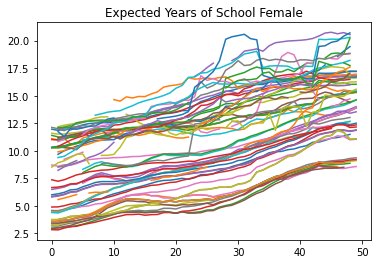

In [21]:
#Graph female

columns = df_school_f.columns.drop(['Year'])

# create x data
x_data = range(0, df_school_f.shape[0])

# create figure and axis
fig, ax = plt.subplots()

# plot each column
for column in columns:
    ax.plot(x_data, df_school_f[column], label=column)

# set title and legend
ax.set_title('Expected Years of School Female');

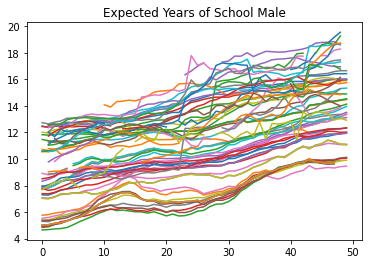

In [22]:
#Graph male

columns = df_school_m.columns.drop(['Year'])

# create x data
x_data = range(0, df_school_m.shape[0])

# create figure and axis
fig, ax = plt.subplots()

# plot each column
for column in columns:
    ax.plot(x_data, df_school_m[column], label=column)

# set title and legend
ax.set_title('Expected Years of School Male');

In [23]:
#Get the mean of each country's expected years of schooling for females,
#so we can see which country has the highest and lowest

#Drop the year, and then get the mean
df_school_f_stats = df_school_f.drop(['Year'], axis=1)
df_school_f_mean_low = df_school_f_stats.mean().dropna().sort_values()
df_school_f_mean_high = df_school_f_stats.mean().dropna().sort_values(ascending=False)

print('Lowest mean 5:', df_school_f_mean_low[0:5])
print('Highest mean 5:', df_school_f_mean_high[0:5])

Lowest mean 5: Country Code
LIC    5.319707
HPC    5.486163
LDC    5.634649
PRE    5.776965
IDX    5.909694
dtype: float64
Highest mean 5: Country Code
FIN    16.556926
BEL    16.556109
NAC    16.155281
SWE    16.022499
NOR    15.597871
dtype: float64


### Averages of Expected Years of Schooling

Lowest means = [LIC, HPC, LDC, PRE, IDX]
1.   Low Income Countries
2.   Heavily Indebted Countries
3.   Least Developed Countries
4.   Pre-demographic countries
5.   IDA countries (poor countries that qualify for debt support)

Highest means = [FIN, BEL, NAC, EMU, EUU]

1.   Finland
2.   Belarus
3.   North America
4.   Euro Area
5.   European Union

Conclusion: This is a mix of regions and countries. I want to compare either countries or regions. I'll go with regions.

In [24]:
#Finding the Country name, one by one

condition = (df['Country Code'] == 'NAC')

df_country_id = df[condition]
df_country_id.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
748,North America,NAC,"Employment to population ratio, 15+, female (%) (modeled ILO estimate)",SL.EMP.TOTL.SP.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.456237,52.410913,52.673934,53.850189,54.281415,54.630929,55.357512,55.734333,56.116817,56.412491,55.951232,55.353648,55.307102,55.217565,55.444886,55.821651,55.916485,55.616429,53.876522,53.046984,52.646120,52.836233,52.862506,53.179315,53.367172,53.710597,54.279787,54.578953,54.469891,54.130385,NaN
749,North America,NAC,"Employment to population ratio, 15+, male (%) (modeled ILO estimate)",SL.EMP.TOTL.SP.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.077441,68.446468,68.618523,69.181554,69.589294,69.703582,70.154680,70.455861,70.679500,70.876149,69.769336,68.616143,67.873932,68.078029,68.396462,68.787581,68.505539,67.436743,63.623138,62.828430,63.125555,64.016870,63.887798,64.341629,64.794642,65.125828,65.465930,65.715344,65.609640,65.271872,NaN


In [25]:
df_country = pd.read_csv('https://raw.githubusercontent.com/TemsyChen/Lambda_Unit1_Build/main/Gender_StatsCountry.csv')

In [26]:
df_country.shape

(263, 31)

In [27]:
#Drop countries so we can just look at regions
#Search in Stats Country file which codes are regions

condition = (df_country['Country Code'] == 'ARB')
df_country[condition]

#Regions have NaN value in the Region column

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed of members of the League of Arab States.,NaN,NaN,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,NaN


In [28]:
#make a list of regions

condition = (df_country['Region'].isnull())
df_country_regions = df_country[condition]
df_country_regions.head(2)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed of members of the League of Arab States.,NaN,NaN,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,NaN
34,CEB,Central Europe and the Baltics,Central Europe and the Baltics,Central Europe and the Baltics,B8,NaN,Central Europe and the Baltics aggregate.,NaN,NaN,B8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,NaN


In [29]:
#Make a list of regions from the Stats Country dataset
#Use the list of regions to reduce the data I'm working with
#Now I'll only be working with regions, not countries

L = df_country_regions['Country Code'].to_list()
L.remove('ECA') #when I ran this the first time, it said these values were missing,
L.remove('PSS') #so I remove them from the list
df_school_f_regions = df_school_f[L]

df_school_f_regions.head(5)

Country Code,ARB,CEB,CSS,EAP,EAR,EAS,ECS,EMU,EUU,FCS,HIC,HPC,IBD,IBT,IDA,IDB,IDX,LAC,LCN,LDC,LIC,LMC,LMY,LTE,MEA,MIC,MNA,NAC,OED,OSS,PRE,PST,SAS,SSA,SSF,SST,TEA,TEC,TLA,TMN,TSA,TSS,UMC,WLD
1970,4.45949,11.3891,11.101,NaN,4.88177,NaN,11.5807,12.1165,11.9537,3.71392,11.0103,2.97209,6.47956,5.84062,3.25656,3.2866,3.16542,10.2488,10.3136,2.82348,3.41414,4.56345,5.79513,NaN,4.55412,5.99491,4.44291,NaN,10.2788,7.35755,2.91111,NaN,3.73578,3.51433,3.52669,8.70167,NaN,NaN,10.2807,4.3841,3.73578,3.52669,NaN,6.65151
1971,4.4239,11.2548,10.99,NaN,4.89304,NaN,11.5078,11.9991,11.8475,3.7542,10.9701,2.98739,6.57314,5.91666,3.26427,3.37191,3.14344,10.3088,10.398,2.80027,3.41649,4.56091,5.87267,NaN,4.50954,6.07856,4.39959,NaN,10.2503,7.22385,2.97929,11.0989,3.7227,3.55991,3.57166,8.58867,NaN,NaN,10.3721,4.34131,3.7227,3.57166,NaN,6.69276
1972,4.5686,11.1645,11.1339,NaN,4.99777,NaN,11.5235,12.1402,11.9231,3.8709,11.0601,3.0493,6.69394,6.04261,3.41154,3.51343,3.29843,10.3411,10.4424,2.96947,3.48847,4.66103,6.00256,NaN,4.68524,6.21401,4.58416,NaN,10.3214,7.35788,3.11066,11.1932,3.84368,3.66451,3.67605,8.72175,NaN,NaN,10.4132,4.52829,3.84368,3.67605,NaN,6.79422
1973,4.72888,11.2056,10.6014,NaN,5.15301,NaN,11.5926,12.3289,12.0691,3.98037,11.2622,3.09794,6.92383,6.25232,3.53686,3.65599,3.42051,10.4927,10.5981,3.09439,3.56313,4.8007,6.21396,NaN,4.89322,6.43821,4.8068,NaN,10.5403,7.58044,3.20812,11.3962,4.03278,3.73793,3.74878,8.67832,NaN,NaN,10.5687,4.75325,4.03278,3.74878,NaN,6.9823
1974,4.84824,11.2452,10.638,NaN,5.21415,NaN,11.6525,12.4245,12.183,4.06133,11.379,3.18977,6.95823,6.29806,3.63011,3.88166,3.46047,10.6306,10.7282,3.132,3.65758,4.84817,6.26048,NaN,5.05613,6.48233,4.9743,NaN,10.6774,7.80286,3.39565,11.5219,4.03364,3.88801,3.8981,8.83285,NaN,NaN,10.6979,4.92226,4.03364,3.8981,NaN,7.01915


In [30]:
#Get the mean of each region's expected years of schooling for females,
#so we can see which region has the highest and lowest

#Drop the year, and then get the mean
df_school_f_mean_low = df_school_f_regions.mean().dropna().sort_values()
df_school_f_mean_high = df_school_f_regions.mean().dropna().sort_values(ascending=False)

print('Highest mean 5:', df_school_f_mean_high[0:5])
print('Lowest mean 5:', df_school_f_mean_low[0:5])

Highest mean 5: Country Code
NAC    16.155281
EMU    14.772835
EUU    14.540005
PST    14.457928
HIC    14.174770
dtype: float64
Lowest mean 5: Country Code
LIC    5.319707
HPC    5.486163
LDC    5.634649
PRE    5.776965
IDX    5.909694
dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


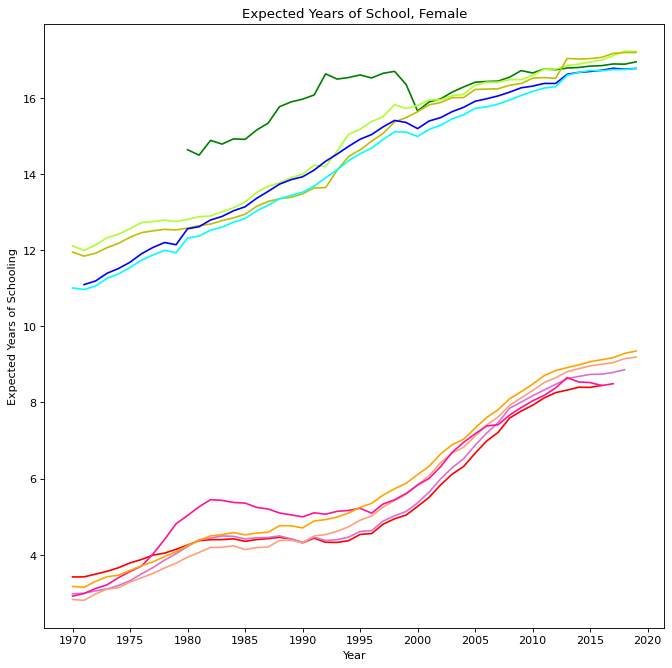

In [31]:
#Graph years of schooling by region, female

#Add year column back in
df_school_f_regions['Year'] = df_school_f['Year']

#Line plot of Expected Years of Schooling from 1970-2019
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

#blue theme for the highest means
plt.plot(df_school_f_regions['Year'],df_school_f_regions['NAC'], color='green') #North America
plt.plot(df_school_f_regions['Year'],df_school_f_regions['EMU'], color='greenyellow') #Euro Area
plt.plot(df_school_f_regions['Year'],df_school_f_regions['EUU'], color='y') #European Union
plt.plot(df_school_f_regions['Year'],df_school_f_regions['PST'], color='b') #Post Demographic
plt.plot(df_school_f_regions['Year'],df_school_f_regions['HIC'], color='cyan') #High Income Countries

#red theme for the lowest means
plt.plot(df_school_f_regions['Year'],df_school_f_regions['LIC'], color='red') #Low Income
plt.plot(df_school_f_regions['Year'],df_school_f_regions['HPC'], color='orchid') #Heavily Indebted
plt.plot(df_school_f_regions['Year'],df_school_f_regions['LDC'], color='lightsalmon') #Least Developed
plt.plot(df_school_f_regions['Year'],df_school_f_regions['PRE'], color='deeppink') #Predemographic
plt.plot(df_school_f_regions['Year'],df_school_f_regions['IDX'], color='orange') #IDA only

plt.title('Expected Years of School, Female')
plt.xlabel('Year')
plt.ylabel('Expected Years of Schooling')
# plt.xticks(rotation=90)
labels = np.arange(1970, 2025,5)
ticks = labels-1970
plt.xticks(ticks=ticks, labels=labels)
# plt.ylim(0,10)
plt.show();

In [32]:
#Repeat for male graph

L = df_country_regions['Country Code'].to_list()
L.remove('ECA')
L.remove('PSS')
df_school_m_regions = df_school_m[L]

df_school_m_regions.head(5)

Country Code,ARB,CEB,CSS,EAP,EAR,EAS,ECS,EMU,EUU,FCS,HIC,HPC,IBD,IBT,IDA,IDB,IDX,LAC,LCN,LDC,LIC,LMC,LMY,LTE,MEA,MIC,MNA,NAC,OED,OSS,PRE,PST,SAS,SSA,SSF,SST,TEA,TEC,TLA,TMN,TSA,TSS,UMC,WLD
1970,7.29777,11.4713,10.7211,NaN,7.39105,NaN,12.0135,12.741,12.4735,5.76224,12.4474,4.65762,8.32372,7.7628,5.40825,5.53446,5.30516,10.5512,10.5822,4.9281,5.35736,7.06098,7.73599,NaN,7.95616,7.92844,7.96497,NaN,11.8291,7.79704,4.84285,NaN,7.03971,5.00508,5.01622,8.91968,NaN,NaN,10.573,7.94096,7.03971,5.01622,NaN,8.51134
1971,7.28083,11.3721,10.6314,NaN,7.37768,NaN,11.9593,12.635,12.3823,5.81401,12.4077,4.68135,8.46481,7.87519,5.40797,5.59753,5.27957,10.5495,10.6118,4.89963,5.37885,7.0444,7.8484,NaN,7.83871,8.0483,7.84474,NaN,11.7984,7.63548,4.91907,12.4896,7.01412,5.04097,5.05084,8.8069,NaN,NaN,10.6067,7.81987,7.01412,5.05084,NaN,8.58427
1972,7.4478,11.3375,10.7653,NaN,7.48556,NaN,11.9958,12.7737,12.4696,5.92211,12.4731,4.73169,8.66049,8.05999,5.55272,5.7127,5.44112,10.6248,10.7,5.08425,5.42656,7.14926,8.03647,NaN,8.0219,8.24884,8.03664,NaN,11.8474,7.71246,5.06681,12.5605,7.13258,5.14501,5.15488,8.89498,NaN,NaN,10.6811,8.0139,7.13258,5.15488,NaN,8.7336
1973,7.64669,11.341,10.3559,NaN,7.66909,NaN,12.0222,12.8605,12.5312,5.99583,12.4549,4.76134,8.99033,8.35524,5.70689,5.79928,5.62845,10.7974,10.872,5.2802,5.49018,7.31762,8.33511,NaN,8.27145,8.56844,8.30347,NaN,11.8691,7.88978,5.14551,12.5493,7.36505,5.18839,5.19748,8.86791,NaN,NaN,10.8477,8.2834,7.36505,5.19748,NaN,8.96505
1974,7.75411,11.3677,10.3925,NaN,7.73773,NaN,12.1256,13.0713,12.7053,6.06035,12.453,4.84028,9.03872,8.41757,5.83476,6.07948,5.69231,10.9514,11.0146,5.35303,5.57621,7.36432,8.39922,NaN,8.44007,8.63297,8.47979,NaN,11.9033,8.07804,5.33986,12.5626,7.37006,5.33138,5.33967,8.98979,NaN,NaN,10.9876,8.4614,7.37006,5.33967,NaN,9.0034


In [33]:
#Get the mean of each region's expected years of schooling for males,
#so we can see which region has the highest and lowest

#Drop the year, and then get the mean
df_school_m_mean_low = df_school_m_regions.mean().dropna().sort_values()
df_school_m_mean_high = df_school_m_regions.mean().dropna().sort_values(ascending=False)

print('Highest mean 5:', df_school_m_mean_high[0:5])
print('Lowest mean 5:', df_school_m_mean_low[0:5])

#not necessary, it's slightly different than female, mostly same

Highest mean 5: Country Code
NAC    15.126245
EMU    14.660363
EUU    14.303714
PST    14.279597
HIC    14.084105
dtype: float64
Lowest mean 5: Country Code
HPC    6.993920
LIC    7.129113
LDC    7.252833
PRE    7.466913
SSA    7.475086
dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


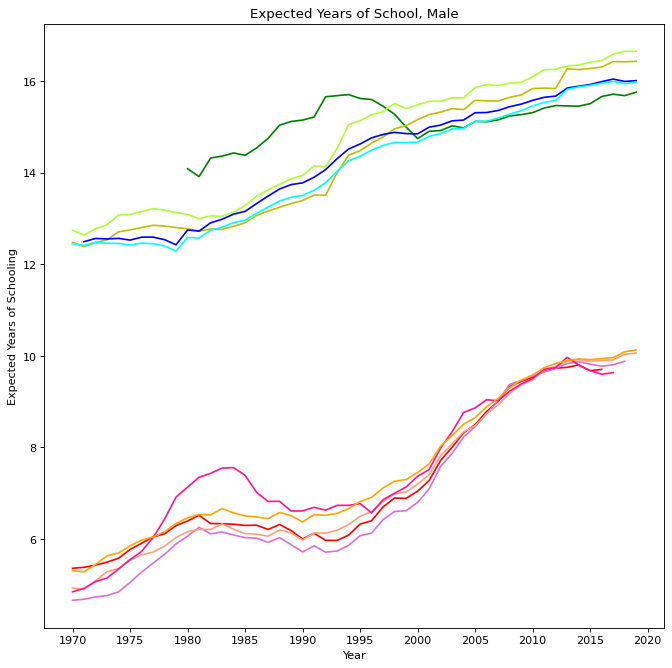

In [34]:
#Graph years of schooling by region, male

#Add year column back in
df_school_m_regions['Year'] = df_school_m['Year']

#Line plot of Expected Years of Schooling from 1970-2019
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

#blue = high means
plt.plot(df_school_m_regions['Year'],df_school_m_regions['NAC'], color='green') #North America
plt.plot(df_school_m_regions['Year'],df_school_m_regions['EMU'], color='greenyellow') #Euro Area
plt.plot(df_school_m_regions['Year'],df_school_m_regions['EUU'], color='y') #European Union
plt.plot(df_school_m_regions['Year'],df_school_m_regions['PST'], color='b') #Post Demographic
plt.plot(df_school_m_regions['Year'],df_school_m_regions['HIC'], color='cyan') #High Income Countries

#red = low means
plt.plot(df_school_m_regions['Year'],df_school_m_regions['LIC'], color='red') #Low Income
plt.plot(df_school_m_regions['Year'],df_school_m_regions['HPC'], color='orchid') #Heavily Indebted
plt.plot(df_school_m_regions['Year'],df_school_m_regions['LDC'], color='lightsalmon') #Least Developed
plt.plot(df_school_m_regions['Year'],df_school_m_regions['PRE'], color='deeppink') #Predemographic
plt.plot(df_school_m_regions['Year'],df_school_m_regions['IDX'], color='orange') #IDA only

plt.title('Expected Years of School, Male')
plt.xlabel('Year')
plt.ylabel('Expected Years of Schooling')
# plt.xticks(rotation=90)
labels = np.arange(1970, 2025,5)
ticks = labels-1970
plt.xticks(ticks=ticks, labels=labels)
# plt.ylim(0,10)
plt.show();

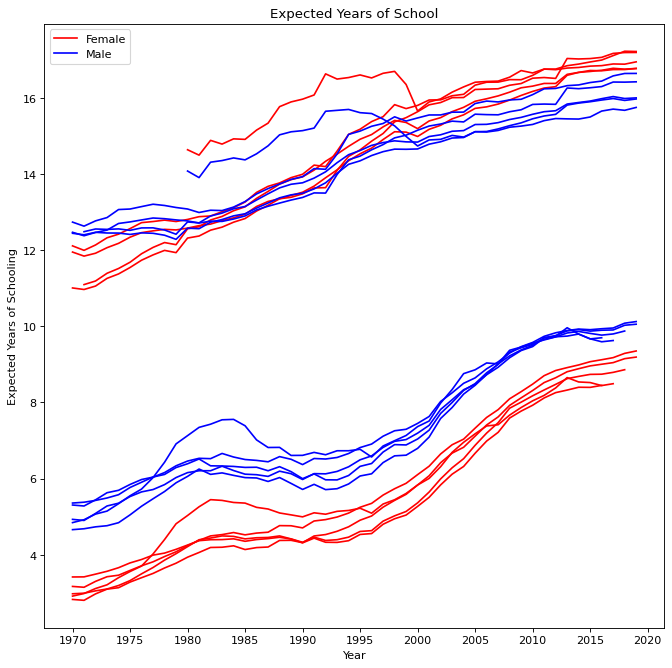

In [35]:
#Two graphs mashed on top of each other, Men vs Women
#Line plot of Expected Years of Schooling from 1970-2019

figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

#Red: high means, female
plt.plot(df_school_f_regions['Year'],df_school_f_regions['NAC'], color='red', label="Female") #North America
plt.plot(df_school_f_regions['Year'],df_school_f_regions['EMU'], color='red') #Euro Area
plt.plot(df_school_f_regions['Year'],df_school_f_regions['EUU'], color='red') #European Union
plt.plot(df_school_f_regions['Year'],df_school_f_regions['PST'], color='red') #Post Demographic
plt.plot(df_school_f_regions['Year'],df_school_f_regions['HIC'], color='red') #High Income Countries

#Blue: high means, male
plt.plot(df_school_m_regions['Year'],df_school_m_regions['NAC'], color='blue', label="Male") #North America
plt.plot(df_school_m_regions['Year'],df_school_m_regions['EMU'], color='blue') #Euro Area
plt.plot(df_school_m_regions['Year'],df_school_m_regions['EUU'], color='blue') #European Union
plt.plot(df_school_m_regions['Year'],df_school_m_regions['PST'], color='blue') #Post Demographic
plt.plot(df_school_m_regions['Year'],df_school_m_regions['HIC'], color='blue') #High Income Countries

#Red: low means, female
plt.plot(df_school_f_regions['Year'],df_school_f_regions['LIC'], color='red') #Low Income
plt.plot(df_school_f_regions['Year'],df_school_f_regions['HPC'], color='red') #Heavily Indebted
plt.plot(df_school_f_regions['Year'],df_school_f_regions['LDC'], color='red') #Least Developed
plt.plot(df_school_f_regions['Year'],df_school_f_regions['PRE'], color='red') #Predemographic
plt.plot(df_school_f_regions['Year'],df_school_f_regions['IDX'], color='red') #IDA only

#Blue: Low means, male
plt.plot(df_school_m_regions['Year'],df_school_m_regions['LIC'], color='blue') #Low Income
plt.plot(df_school_m_regions['Year'],df_school_m_regions['HPC'], color='blue') #Heavily Indebted
plt.plot(df_school_m_regions['Year'],df_school_m_regions['LDC'], color='blue') #Least Developed
plt.plot(df_school_m_regions['Year'],df_school_m_regions['PRE'], color='blue') #Predemographic
plt.plot(df_school_m_regions['Year'],df_school_m_regions['IDX'], color='blue') #IDA only

plt.title('Expected Years of School')
plt.xlabel('Year')
plt.ylabel('Expected Years of Schooling')
# plt.xticks(rotation=90)
labels = np.arange(1970, 2025,5)
ticks = labels-1970
plt.xticks(ticks=ticks, labels=labels)
# plt.ylim(0,10)

plt.legend(loc="upper left")
plt.show();

Something is interesting here!

In all regions, expected years of school increases almost uniformly.
However, in rich countries, women surpassed men around 1985.

I'll choose Pre and Post-demographic regions to represent my case here. As regions, they are opposite sides of the same idea (low birth/death rates vs high), and they both show up in the extremes of high and low averages in my data exploration.

#3.1 Visualization #1
Expected years of schooling from 1970-2019.

Comparing pre demographic and post demographic countries.
Also comparing years expected for females versus males.

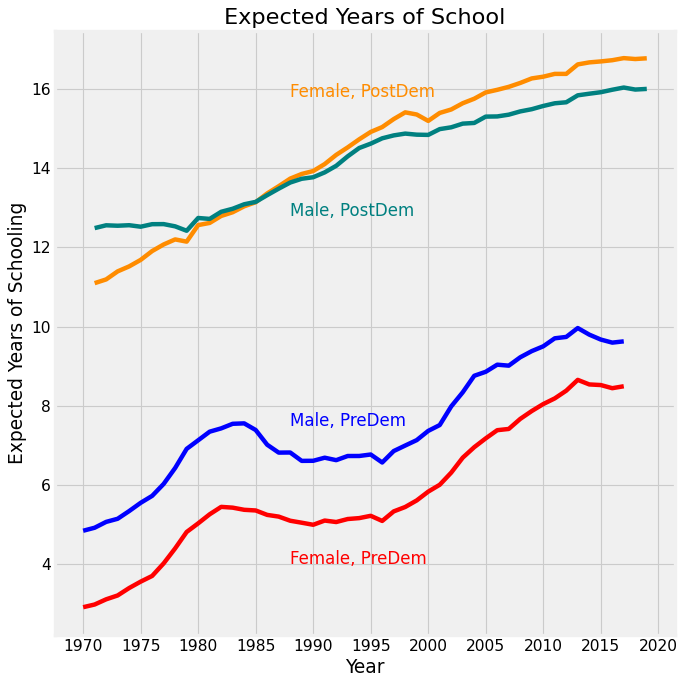

In [36]:
#Line plot of Expected Years of Schooling from 1970-2019
#With pre and post-demographic countries

figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.style.use('fivethirtyeight')

plt.plot(df_school_f_regions['Year'],df_school_f_regions['PRE'], color='red', label="Female") #Predemographic
plt.text(18, 4, r'Female, PreDem', fontsize=15, color = 'red')
plt.plot(df_school_m_regions['Year'],df_school_m_regions['PRE'], color='blue', label="Male") #Predemographic
plt.text(18, 7.5, r'Male, PreDem', fontsize=15, color = 'blue')

plt.plot(df_school_f_regions['Year'],df_school_f_regions['PST'], color='darkorange') #Post Demographic
plt.text(18, 15.8, r'Female, PostDem', fontsize=15, color = 'darkorange')
plt.plot(df_school_m_regions['Year'],df_school_m_regions['PST'], color='teal') #Post Demographic
plt.text(18, 12.8, r'Male, PostDem', fontsize=15, color = 'teal')

plt.title('Expected Years of School')
plt.xlabel('Year')
plt.ylabel('Expected Years of Schooling')
# plt.xticks(rotation=90)
labels = np.arange(1970, 2025,5)
ticks = labels-1970
plt.xticks(ticks=ticks, labels=labels)
# plt.ylim(0,10)

# plt.legend(loc="upper left")
plt.show();

### 3.2 Visualization #2
Employment to population ratio.

I explored other features, like female business owners, and proportions of female leaders in government, but they lacked the data to make a strong visualization. Employment to population ratio had enough data points, and is a more general observation on gender parity.

In [37]:
# 103 Employment to population ratio, 15+, female (%) (modeled ILO estimate)
# 105 Employment to population ratio, 15+, male (%) (modeled ILO estimate)

#Create a subset of each country's response to this question
condition_employment_female = (df['Indicator Code'] == df.loc[103, 'Indicator Code'])
condition_employment_male = (df['Indicator Code'] == df.loc[105, 'Indicator Code'])

df_employment_f = df[condition_employment_female]
df_employment_m = df[condition_employment_male]

In [38]:
df_employment_m.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
105,Arab World,ARB,"Employment to population ratio, 15+, male (%) (modeled ILO estimate)",SL.EMP.TOTL.SP.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.877823,67.113643,66.640207,66.802357,66.400959,66.578793,66.806812,66.441768,66.514367,66.218700,65.776662,65.655120,65.607638,66.449093,66.581357,67.087144,67.366695,67.883671,68.559456,69.027762,68.258684,68.248877,68.440462,68.091696,67.702952,67.619010,67.066000,67.072864,67.206761,67.267651,NaN
625,Caribbean small states,CSS,"Employment to population ratio, 15+, male (%) (modeled ILO estimate)",SL.EMP.TOTL.SP.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.232023,69.764435,69.030428,69.659822,69.759379,69.894082,69.801730,70.034063,69.779331,69.780765,69.444662,69.066798,69.546619,69.470495,69.515102,69.652693,69.984459,69.035839,67.653610,66.671421,66.245970,65.498708,65.525261,66.009002,66.179291,66.264508,66.875304,67.037092,67.240415,67.062236,NaN
629,Central Europe and the Baltics,CEB,"Employment to population ratio, 15+, male (%) (modeled ILO estimate)",SL.EMP.TOTL.SP.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.942519,63.274082,61.898349,61.110029,60.846713,60.607713,60.678983,60.221779,58.550207,57.150600,56.358929,54.634746,54.729260,54.596729,55.405039,56.643356,58.211851,59.357007,58.005289,57.392751,57.305383,57.557700,57.720178,58.925667,59.740982,60.609573,62.042441,62.798014,62.838268,62.653395,NaN
633,Early-demographic dividend,EAR,"Employment to population ratio, 15+, male (%) (modeled ILO estimate)",SL.EMP.TOTL.SP.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.536973,78.359984,78.013924,77.873452,77.428060,77.311470,77.261362,77.079716,76.834726,76.512944,76.327374,75.955741,75.933849,76.256449,76.120213,76.054431,75.889645,75.592763,75.049278,74.906368,74.684656,74.518016,74.191799,73.907839,73.563401,73.238904,73.102212,72.844736,72.700625,72.618854,NaN
637,East Asia & Pacific,EAS,"Employment to population ratio, 15+, male (%) (modeled ILO estimate)",SL.EMP.TOTL.SP.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.868391,80.873284,80.643022,80.501876,80.369144,80.170802,79.931927,79.518642,79.190173,78.885745,78.134454,77.315184,76.525436,76.230625,75.695753,75.479824,75.391759,75.066156,74.714177,74.667703,74.672822,74.580112,74.304936,74.120219,73.783664,73.506673,73.294387,73.131715,72.809696,72.449894,NaN


In [39]:
#Clean up data for Employment Male
#Drop unused rows
df_employment_m_drop = df_employment_m.drop(['Country Name', '2020','Unnamed: 65'], axis=1).drop(df_employment_m.iloc[:,2:35], axis=1)

#Transpose the table
df_employment_m_T = df_employment_m_drop.T

#Create a new column of the years
df_employment_m_year = df_employment_m_T.index

#Replace column headers with the first row 'Country Code'
new_header = df_employment_m_T.iloc[0] #grab the first row for the header
df_employment_m_T = df_employment_m_T[1:] #take the data less the header row
df_employment_m_T.columns = new_header #set the header row as the df header

#From the 'Year' column, drop the title 'Country Codes'
df_employment_m_year = df_employment_m_year[1:]

#Add the year column to the data subset
df_employment_m_T['Year'] = df_employment_m_year
df_employment_m = df_employment_m_T
df_employment_m.head(5)

Country Code,ARB,CSS,CEB,EAR,EAS,EAP,TEA,EMU,ECS,ECA,TEC,EUU,FCS,HPC,HIC,IBD,IBT,IDB,IDX,IDA,LTE,LCN,LAC,TLA,LDC,LMY,LIC,LMC,MEA,MNA,TMN,MIC,NAC,OED,OSS,PSS,PST,PRE,SST,SAS,...,SSD,ESP,LKA,KNA,LCA,MAF,VCT,SDN,SUR,SWE,CHE,SYR,TJK,TZA,THA,TLS,TGO,TON,TTO,TUN,TUR,TKM,TCA,TUV,UGA,UKR,ARE,GBR,USA,URY,UZB,VUT,VEN,VNM,VIR,PSE,YEM,ZMB,ZWE,Year
1991,67.8778,70.232,63.9425,78.537,80.8684,81.8616,81.8112,64.044,66.5767,69.2966,68.5889,64.0626,72.463,78.0524,68.3376,78.2102,78.261,75.2473,80.2006,78.5147,79.4499,76.9247,77.3694,77.6393,80.6292,78.4991,77.305,77.9984,68.9491,68.0363,68.0837,78.5749,69.0774,69.3168,68.0704,75.5269,67.7987,72.8958,69.0284,80.6639,...,68.778,59.163,70.033,NaN,68.478,NaN,65.968,66.117,55.111,69.157,79.753,79.753,54.289,87.919,82.48,77.218,79.85,75.194,73.433,63.735,73.17,73.2,NaN,NaN,76.781,65.541,88.807,66.488,69.331,70.9,72.875,74.996,71.767,79.627,66.386,62.229,66.538,72.255,85.247,1991
1992,67.1136,69.7644,63.2741,78.36,80.8733,81.8452,81.791,62.6715,65.6273,68.9978,68.2617,62.8398,72.2903,77.9605,67.5411,78.1015,78.1418,75.0114,80.0551,78.3415,79.397,76.939,77.3569,77.6408,80.5258,78.3822,77.1758,77.847,68.1034,67.1887,67.2298,78.4595,68.4465,68.6093,67.4679,75.4646,66.9976,72.7535,68.486,80.5661,...,68.725,57.216,68.686,NaN,68.422,NaN,65.545,65.845,55.726,65.289,78.276,77.692,54.099,87.897,82.896,77.48,79.77,75.222,72.413,63.313,72.565,73.071,NaN,NaN,76.747,65.335,89.046,64.069,68.852,70.848,72.054,74.987,72.972,79.646,66.12,62.222,66.535,71.077,85.035,1992
1993,66.6402,69.0304,61.8983,78.0139,80.643,81.6174,81.5574,60.798,64.0004,67.4723,66.8846,61.1208,72.1116,77.7604,66.7439,77.7569,77.7816,74.1934,79.8063,77.9024,79.0097,76.9106,77.3322,77.5813,80.3386,78.0283,76.9296,77.5543,67.5499,66.5259,66.5635,78.0994,68.6185,67.8741,66.8123,75.3787,66.1801,72.5955,67.8418,80.2882,...,68.534,53.55,69.537,NaN,67.918,NaN,64.855,65.515,58.026,60.944,77.717,76.132,51.709,87.784,82.688,77.763,79.717,75.126,71.21,63.073,71.007,73.058,NaN,NaN,76.463,65.12,89.379,62.453,69.09,69.717,70.517,74.984,73.787,79.596,65.796,62.028,66.646,69.616,84.626,1993
1994,66.8024,69.6598,61.11,77.8735,80.5019,81.4597,81.3951,59.7505,62.7406,65.4965,65.0631,60.1729,71.9291,77.6235,66.5316,77.389,77.4552,74.0467,79.686,77.776,78.4864,76.3804,76.782,76.9935,80.2115,77.7168,76.7927,77.5153,67.5524,66.5037,66.5426,77.7772,69.1816,67.6143,66.39,75.2752,65.9973,72.4767,67.6866,80.258,...,68.442,52.154,69.634,NaN,67.519,NaN,64.574,65.33,58.552,60.572,76.568,77.033,50.162,87.689,82.537,78.107,79.361,74.65,72.508,62.958,71.399,70.163,NaN,NaN,76.211,65.083,90.019,62.793,69.652,70.384,68.668,74.823,73.113,79.568,65.791,61.904,66.495,70.486,84.15,1994
1995,66.401,69.7594,60.8467,77.4281,80.3691,81.319,81.2512,59.5651,62.2062,64.1762,63.9005,60.0497,71.7152,77.4918,66.6766,76.9406,77.0536,73.7847,79.5441,77.5957,78.1775,75.1558,75.4418,75.7018,80.0591,77.3104,76.6529,77.2016,67.0202,65.7432,65.7776,77.3538,69.5893,67.5194,65.8676,75.1492,65.9737,72.3367,67.3307,80.0593,...,68.644,52.661,68.221,NaN,67.753,NaN,64.206,65.177,61.78,61.768,76.85,77.681,49.226,87.542,82.148,78.167,78.942,74.075,73.343,62.664,71.439,67.178,NaN,NaN,75.984,62.532,90.55,63.448,70.085,70.674,68.339,74.76,72.499,79.501,65.824,61.72,65.821,71.867,83.194,1995


In [40]:
#Clean up data for Employment Female
#Drop unused rows
df_employment_f_drop = df_employment_f.drop(['Country Name', '2020','Unnamed: 65'], axis=1).drop(df_employment_f.iloc[:,2:35], axis=1)

#Transpose the table
df_employment_f_T = df_employment_f_drop.T

#Create a new column of the years
df_employment_f_year = df_employment_f_T.index

#Replace column headers with the first row 'Country Code'
new_header = df_employment_f_T.iloc[0] #grab the first row for the header
df_employment_f_T = df_employment_f_T[1:] #take the data less the header row
df_employment_f_T.columns = new_header #set the header row as the df header

#From the 'Year' column, drop the title 'Country Codes'
df_employment_f_year = df_employment_f_year[1:]

#Add the year column to the data subset
df_employment_f_T['Year'] = df_employment_f_year
df_employment_f = df_employment_f_T
df_employment_f.head(5)

Country Code,ARB,CSS,CEB,EAR,EAS,EAP,TEA,EMU,ECS,ECA,TEC,EUU,FCS,HPC,HIC,IBD,IBT,IDB,IDX,IDA,LTE,LCN,LAC,TLA,LDC,LMY,LIC,LMC,MEA,MNA,TMN,MIC,NAC,OED,OSS,PSS,PST,PRE,SST,SAS,...,SSD,ESP,LKA,KNA,LCA,MAF,VCT,SDN,SUR,SWE,CHE,SYR,TJK,TZA,THA,TLS,TGO,TON,TTO,TUN,TUR,TKM,TCA,TUV,UGA,UKR,ARE,GBR,USA,URY,UZB,VUT,VEN,VNM,VIR,PSE,YEM,ZMB,ZWE,Year
1991,16.3655,42.6611,49.6815,33.0172,64.5031,67.1004,66.9804,38.4088,45.6544,50.3369,50.3082,41.3922,51.1513,60.6197,45.768,49.4712,49.3404,40.7864,52.6074,48.6961,63.1403,38.4916,38.8141,38.7626,54.1388,49.4927,58.3821,36.4672,14.5553,13.57,13.5929,48.8933,52.4562,44.5923,42.1457,47.7411,46.4722,57.1664,42.574,27.831,...,61.346,26.118,32.166,NaN,36.995,NaN,34.823,19.305,26.424,60.632,55.4,20.572,28.797,81.113,63.735,64.867,77.293,37.441,38.583,18.568,31.517,48.03,NaN,NaN,62.186,53.553,28.173,47.98,52.48,40.403,48.38,57.712,41.344,71.333,54.251,10.73,16.062,57.532,71.837,1991
1992,16.4834,43.0388,49.0801,33.253,64.6244,67.2263,67.1099,37.9691,45.1782,49.7863,49.7619,40.9054,51.0531,60.5288,45.5743,49.5111,49.3629,40.7542,52.5351,48.6394,63.1298,39.353,39.6742,39.6545,54.0266,49.5186,58.1986,36.4301,14.7077,13.8987,13.9249,48.929,52.4109,44.3885,41.8394,47.8458,46.2661,57.069,42.457,27.7599,...,61.236,25.864,29.705,NaN,37.279,NaN,35.523,19.96,25.976,58.288,55.168,21.041,28.877,81.163,64.614,64.824,77.215,39.86,39.868,18.603,29.985,48.46,NaN,NaN,62.318,53.248,28.929,47.982,52.521,41.674,48.387,57.668,43.003,71.23,53.9,10.688,16.133,58.077,71.89,1992
1993,16.3035,43.7262,47.66,33.1243,64.3469,66.9386,66.8213,37.2824,43.9207,47.7742,47.9384,40.0803,50.9368,60.39,45.2414,49.1945,49.0937,40.8285,52.4463,48.6063,62.818,40.1571,40.4855,40.4684,53.9295,49.2553,57.9476,36.4486,14.633,13.7413,13.7661,48.6605,52.6739,43.9198,41.4008,48.1177,45.9269,56.998,42.331,27.8659,...,61.06,25.02,29.581,NaN,37.902,NaN,36.266,20.606,25.328,54.918,54.396,21.747,27.856,81.195,63.987,64.794,77.156,42.122,41.245,18.718,24.116,48.676,NaN,NaN,62.381,52.967,29.782,47.843,52.863,40.868,47.659,57.724,43.716,71.171,53.391,10.751,16.119,58.579,71.803,1993
1994,16.4633,44.3334,46.8079,33.3211,64.1684,66.6902,66.5723,37.1673,43.3545,46.682,46.9115,39.8137,50.6591,60.344,45.5165,48.9896,48.9247,40.9193,52.4096,48.6135,62.3928,40.5476,40.8832,40.8683,53.92,49.0922,57.7155,36.566,14.8672,13.9146,13.9407,48.4973,53.8502,44.348,41.2632,48.2139,46.2345,56.9912,42.3852,28.0206,...,61.048,24.82,30.7,NaN,38.338,NaN,36.56,21.278,28.063,53.853,53.583,20.526,27.245,81.301,63.742,64.917,76.962,44.204,42.151,18.76,28.555,48.055,NaN,NaN,62.428,53.069,30.206,48.019,54.132,41.915,46.774,57.356,41.825,71.092,53.247,10.794,16.209,60.062,71.736,1994
1995,16.3374,44.2775,46.2996,33.1076,64.0298,66.5044,66.3869,37.3761,42.9706,45.592,45.9476,39.8813,50.4823,60.3857,45.7338,48.7116,48.6531,40.1135,52.4497,48.3759,62.2244,40.7941,41.0767,41.1165,53.9821,48.8131,57.656,36.3032,14.8241,13.6659,13.6893,48.1975,54.2814,44.5463,41.0389,48.2414,46.3338,56.974,42.213,27.7992,...,61.032,25.488,29.428,NaN,39.781,NaN,37.335,21.966,29.241,54.448,53.621,20.014,26.928,81.416,64.995,64.843,76.947,43.714,42.86,18.964,28.498,46.9,NaN,NaN,62.447,51.352,30.545,48.231,54.577,42.917,46.642,57.54,40.789,70.986,53.197,10.9,16.973,60.876,71.276,1995


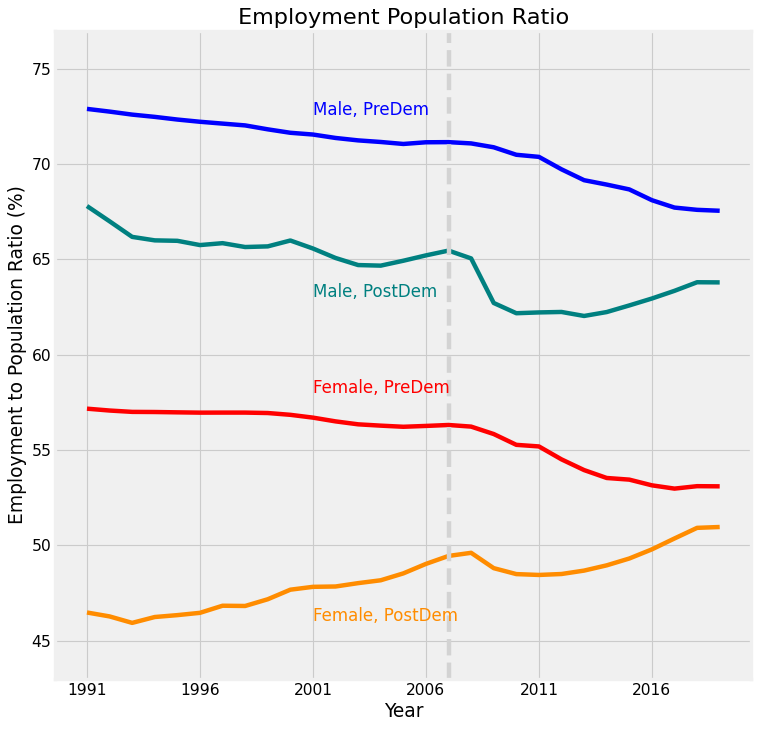

In [41]:
#Line plot of Employment population ratio from 1991-2019
#Repeated, only with pre and post-demographic countries

figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.style.use('fivethirtyeight')

plt.plot(df_employment_f['Year'],df_employment_f['PRE'], color='red', label="Female") #Predemographic
plt.plot(df_employment_m['Year'],df_employment_m['PRE'], color='blue', label="Male") #Predemographic

plt.plot(df_employment_f['Year'],df_employment_f['PST'], color='darkorange') #Post Demographic
plt.plot(df_employment_m['Year'],df_employment_m['PST'], color='teal') #Post Demographic

plt.text(10, 58, r'Female, PreDem', fontsize=15, color = 'red')
plt.text(10, 72.6, r'Male, PreDem', fontsize=15, color = 'blue')
plt.text(10, 46, r'Female, PostDem', fontsize=15, color = 'darkorange')
plt.text(10, 63, r'Male, PostDem', fontsize=15, color = 'teal')

#Vertical line at 2007
plt.axvline(16, color='lightgray', linestyle='--')

plt.title('Employment Population Ratio')
plt.xlabel('Year')
plt.ylabel('Employment to Population Ratio (%)')
# plt.xticks(rotation=90)
labels = np.arange(1991, 2020,5)
ticks = labels-1991
plt.xticks(ticks=ticks, labels=labels)
plt.ylim(43,77)

# plt.legend(loc="upper left")
plt.show();

#Correlation test between Education and Employment

In [42]:
#Correlation between Education and Employment

#Merge:
#employment male PRE
#employment male PST
#employment female PRE
#employment female PST
#schooling male PRE
#schooling male PST
#schooling female PRE
#schooling female PST

#Reduce all the datasets and rename the columns
emp_m_pre = pd.DataFrame(df_employment_m['PRE'])
emp_m_pre = emp_m_pre.rename(columns={'PRE':'Emp_M_PRE'})

emp_f_pre = pd.DataFrame(df_employment_f['PRE'])
emp_f_pre = emp_f_pre.rename(columns={'PRE':'Emp_F_PRE'})

emp_m_pst = pd.DataFrame(df_employment_m['PST'])
emp_m_pst = emp_m_pst.rename(columns={'PST':'Emp_M_PST'})

emp_f_pst = pd.DataFrame(df_employment_f['PST'])
emp_f_pst = emp_f_pst.rename(columns={'PST':'Emp_F_PST'})

school_m_pre = pd.DataFrame(df_school_m_regions['PRE'])
school_m_pre = school_m_pre.rename(columns={'PRE':'School_M_PRE'})

school_f_pre = pd.DataFrame(df_school_f_regions['PRE'])
school_f_pre = school_f_pre.rename(columns={'PRE':'School_F_PRE'})

school_m_pst = pd.DataFrame(df_school_m_regions['PST'])
school_m_pst = school_m_pst.rename(columns={'PST':'School_M_PST'})

school_f_pst = pd.DataFrame(df_school_f_regions['PST'])
school_f_pst = school_f_pst.rename(columns={'PST':'School_F_PST'})

#Merge based on Year
from functools import reduce

data_frames = [emp_m_pre, emp_f_pre, emp_m_pst, emp_f_pst, school_m_pre, school_f_pre, school_m_pst, school_f_pst]

df_merged = reduce(lambda  left,right: pd.merge(left,right,left_index=True, right_index=True, how='inner'), data_frames)
df_merged

,Emp_M_PRE,Emp_F_PRE,Emp_M_PST,Emp_F_PST,School_M_PRE,School_F_PRE,School_M_PST,School_F_PST
1991,72.8958,57.1664,67.7987,46.4722,6.68841,5.10042,13.8975,14.1075
1992,72.7535,57.069,66.9976,46.2661,6.62658,5.06333,14.0633,14.3395
1993,72.5955,56.998,66.1801,45.9269,6.73132,5.1392,14.3026,14.5288
1994,72.4767,56.9912,65.9973,46.2345,6.7319,5.16225,14.5132,14.7327
1995,72.3367,56.974,65.9737,46.3338,6.76938,5.22045,14.623,14.9195
1996,72.2202,56.9581,65.7504,46.4542,6.56744,5.09076,14.7581,15.0421
1997,72.1237,56.9608,65.8504,46.8271,6.85649,5.33167,14.8317,15.2441
1998,72.0288,56.9604,65.6477,46.814,6.99594,5.44341,14.8773,15.4141
1999,71.8229,56.9382,65.6816,47.1666,7.13278,5.60904,14.8502,15.3597
2000,71.6423,56.8439,65.9897,47.6688,7.36595,5.83114,14.8444,15.1979


In [43]:
#Correlation matrix

#dataframe was all objects, convert to float for correlation matrix
df_merged = df_merged.astype(float)
df_merged.dtypes

df_merged.corr()


,Emp_M_PRE,Emp_F_PRE,Emp_M_PST,Emp_F_PST,School_M_PRE,School_F_PRE,School_M_PST,School_F_PST
Emp_M_PRE,1.000000,0.983193,0.774543,-0.890639,-0.859765,-0.903134,-0.922441,-0.906372
Emp_F_PRE,0.983193,1.000000,0.797135,-0.821523,-0.823672,-0.876037,-0.883524,-0.867957
Emp_M_PST,0.774543,0.797135,1.000000,-0.651390,-0.884727,-0.903104,-0.880716,-0.884412
Emp_F_PST,-0.890639,-0.821523,-0.651390,1.000000,0.909495,0.909964,0.900488,0.905459
School_M_PRE,-0.859765,-0.823672,-0.884727,0.909495,1.000000,0.993868,0.926982,0.945463
School_F_PRE,-0.903134,-0.876037,-0.903104,0.909964,0.993868,1.000000,0.944135,0.957342
School_M_PST,-0.922441,-0.883524,-0.880716,0.900488,0.926982,0.944135,1.000000,0.995907
School_F_PST,-0.906372,-0.867957,-0.884412,0.905459,0.945463,0.957342,0.995907,1.000000


Correlations for groups Education/Employment are as follows:

*   Male PRE: -.8597
*   Female PRE: -.876
*   Male PST: -.881
*   Female PST: .905


#Visualization #1 Update: Education with Gender Gap

In [44]:
#Calculate the gap between men and women
#Start with Education:
#Find the difference between men PRE and women PRE

#create a new merged dataframe with all the values from 1970
df_merged_full = reduce(lambda  left,right: pd.merge(left,right,left_index=True, right_index=True, how='outer'), data_frames)

#create a new column with the differences between men and women
df_merged_full['School_Gap_PRE'] = df_merged_full['School_M_PRE']-df_merged_full['School_F_PRE']
df_merged_full['School_Gap_PST'] = df_merged_full['School_M_PST']-df_merged_full['School_F_PST']
df_merged_full['Employed_Gap_PRE'] = df_merged_full['Emp_M_PRE']-df_merged_full['Emp_F_PRE']
df_merged_full['Employed_Gap_PST'] = df_merged_full['Emp_M_PST']-df_merged_full['Emp_F_PST']
df_merged_full

,Emp_M_PRE,Emp_F_PRE,Emp_M_PST,Emp_F_PST,School_M_PRE,School_F_PRE,School_M_PST,School_F_PST,School_Gap_PRE,School_Gap_PST,Employed_Gap_PRE,Employed_Gap_PST
1970,NaN,NaN,NaN,NaN,4.84285,2.91111,NaN,NaN,1.93174,NaN,NaN,NaN
1971,NaN,NaN,NaN,NaN,4.91907,2.97929,12.4896,11.0989,1.93978,1.39073,NaN,NaN
1972,NaN,NaN,NaN,NaN,5.06681,3.11066,12.5605,11.1932,1.95615,1.36734,NaN,NaN
1973,NaN,NaN,NaN,NaN,5.14551,3.20812,12.5493,11.3962,1.93739,1.15318,NaN,NaN
1974,NaN,NaN,NaN,NaN,5.33986,3.39565,12.5626,11.5219,1.94421,1.0408,NaN,NaN
1975,NaN,NaN,NaN,NaN,5.54829,3.55705,12.5248,11.6862,1.99124,0.83864,NaN,NaN
1976,NaN,NaN,NaN,NaN,5.72425,3.70122,12.5884,11.9096,2.02303,0.67887,NaN,NaN
1977,NaN,NaN,NaN,NaN,6.02592,4.01873,12.5905,12.076,2.00719,0.51453,NaN,NaN
1978,NaN,NaN,NaN,NaN,6.42917,4.39785,12.5338,12.2039,2.03132,0.32997,NaN,NaN
1979,NaN,NaN,NaN,NaN,6.912,4.81206,12.4225,12.1476,2.09994,0.27486,NaN,NaN


In [45]:
#Create an index column to plot on
df_merged_full = df_merged_full.reset_index()

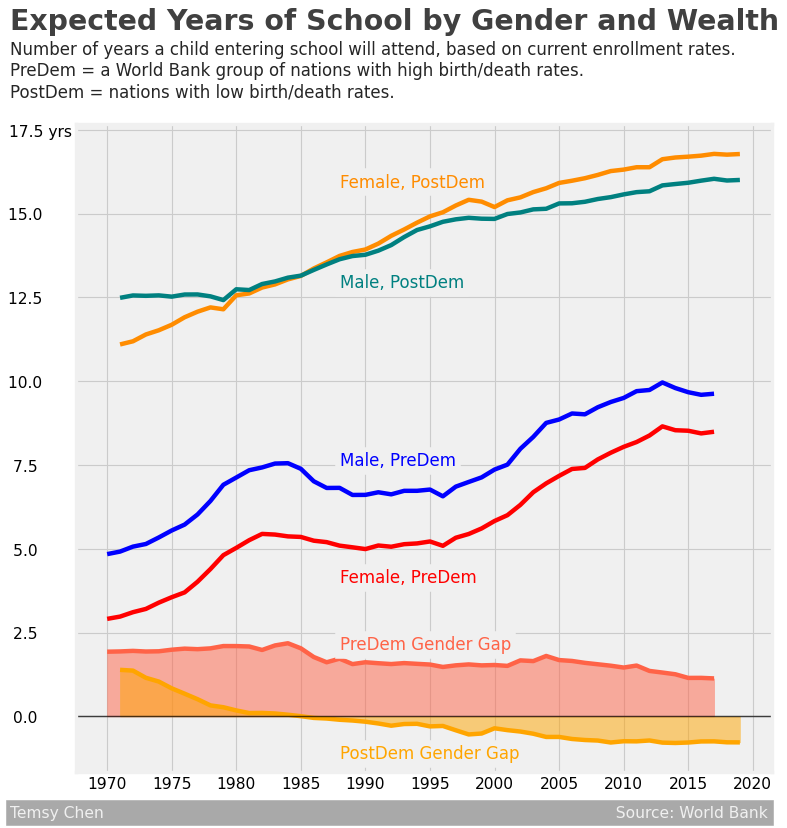

In [46]:
#Education visualization with gender gaps plotted

figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.style.use('fivethirtyeight')

#plot the lines
plt.plot(df_school_f_regions['Year'],df_school_f_regions['PRE'], color='red', label="Female") #Predemographic
plt.plot(df_school_m_regions['Year'],df_school_m_regions['PRE'], color='blue', label="Male") #Predemographic
plt.plot(df_school_f_regions['Year'],df_school_f_regions['PST'], color='darkorange') #Post Demographic
plt.plot(df_school_m_regions['Year'],df_school_m_regions['PST'], color='teal') #Post Demographic

plt.plot(df_merged_full['index'], df_merged_full['School_Gap_PRE'], color='tomato') #Education Gap PreDem
plt.plot(df_merged_full['index'], df_merged_full['School_Gap_PST'], color='orange') #Education Gap PostDem

#Text
plt.text(18, 4, r'Female, PreDem', fontsize=15, color = 'red', backgroundcolor = '#f0f0f0')
plt.text(18, 7.5, r'Male, PreDem', fontsize=15, color = 'blue', backgroundcolor = '#f0f0f0')
plt.text(18, 15.8, r'Female, PostDem', fontsize=15, color = 'darkorange', backgroundcolor = '#f0f0f0')
plt.text(18, 12.8, r'Male, PostDem', fontsize=15, color = 'teal', backgroundcolor = '#f0f0f0')

plt.text(18, 2, r'PreDem Gender Gap', fontsize=15, color = 'tomato', backgroundcolor = '#f0f0f0')
plt.text(18, -1.25, r'PostDem Gender Gap', fontsize=15, color = 'orange', backgroundcolor = '#f0f0f0')

#Fill/shade the gender gap lines
plt.fill_between(df_school_f_regions['Year'], df_merged_full['School_Gap_PRE'].astype(float), color = 'tomato', alpha=0.5)
plt.fill_between(df_school_f_regions['Year'], df_merged_full['School_Gap_PST'].astype(float), color = 'orange', alpha=0.5)

#Titles and axes
# plt.title('Expected Years of School')
# plt.xlabel('Year')
# plt.ylabel('Expected Years of Schooling')
# plt.xticks(rotation=90)
labels = np.arange(1970, 2025,5)
ticks = labels-1970
plt.xticks(ticks=ticks, labels=labels)
# plt.ylim(0,10)
plt.yticks(ticks = np.arange(0,18,2.5), labels = ('0.0       ', '2.5       ', '5.0       ', '7.5       ', '10.0      ', '12.5      ', '15.0      ', '17.5 yrs'))

#Generate a bolded horizontal line at y = 0
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

#Signature bar
plt.text(x = -7.5, y = -3,
    s = 'Temsy Chen                                                                                                         Source: World Bank',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'darkgrey')

#Title and subtitle
plt.text(x = -7.5, y = 20.5, s = "Expected Years of School by Gender and Wealth",
               fontsize = 25.5, weight = 'bold', alpha = .75)
# plt.text(x = -7.5, y = 18.5,
#                s = 'PreDem = Pre-Demographic, populations with high birth and death rates,\nPostDem = Post-Demographic, populations with low birth and death rates',
#               fontsize = 17, alpha = .85)
plt.text(x = -7.5, y = 18.5,
               s = 'Number of years a child entering school will attend, based on current enrollment rates.\nPreDem = a World Bank group of nations with high birth/death rates.\nPostDem = nations with low birth/death rates.',
              fontsize = 15, alpha = .85)


# plt.legend(loc="upper left")
plt.show();

#Visualization 2 Update: Employment with Gender Gap

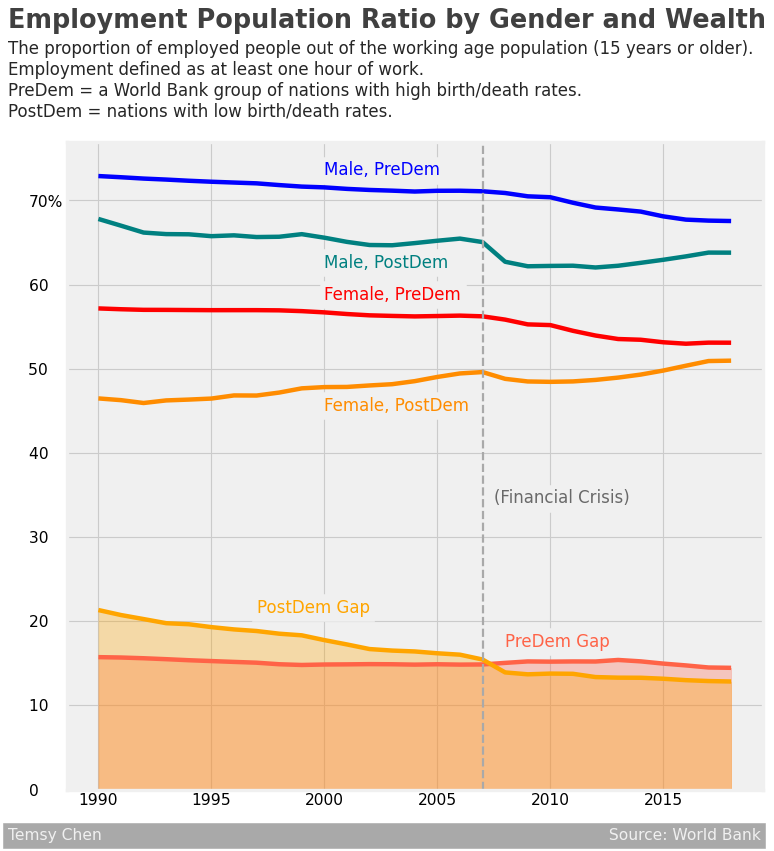

In [56]:
#Employment plotted with gender gap

figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.style.use('fivethirtyeight')

plt.plot(df_employment_f['Year'],df_employment_f['PRE'], color='red', label="Female") #Predemographic
plt.plot(df_employment_m['Year'],df_employment_m['PRE'], color='blue', label="Male") #Predemographic

plt.plot(df_employment_f['Year'],df_employment_f['PST'], color='darkorange') #Post Demographic
plt.plot(df_employment_m['Year'],df_employment_m['PST'], color='teal') #Post Demographic

plt.plot(df_merged_full['index'], df_merged_full['Employed_Gap_PRE'], color='tomato') #Education Gap PreDem
plt.plot(df_merged_full['index'], df_merged_full['Employed_Gap_PST'], color='orange') #Education Gap PostDem

plt.fill_between(df_school_f_regions['Year'], df_merged_full['Employed_Gap_PRE'].astype(float), color = 'tomato', alpha=0.3)
plt.fill_between(df_school_f_regions['Year'], df_merged_full['Employed_Gap_PST'].astype(float), color = 'orange', alpha=0.3)

plt.text(10, 58.2, r'Female, PreDem', fontsize=15, color = 'red', backgroundcolor = '#f0f0f0')
plt.text(10, 73, r'Male, PreDem', fontsize=15, color = 'blue', backgroundcolor = '#f0f0f0')
plt.text(10, 45, r'Female, PostDem', fontsize=15, color = 'darkorange', backgroundcolor = '#f0f0f0')
plt.text(10, 62, r'Male, PostDem', fontsize=15, color = 'teal', backgroundcolor = '#f0f0f0')


plt.text(18, 17, r'PreDem Gap', fontsize=15, color = 'tomato', backgroundcolor = '#f0f0f0')
plt.text(7, 21, r'PostDem Gap', fontsize=15, color = 'orange', backgroundcolor = '#f0f0f0')

plt.text(17.5, 34, r'(Financial Crisis)', fontsize=15, color = 'dimgray', backgroundcolor = '#f0f0f0')

#Vertical line at 2007
plt.axvline(17, linewidth = 2, color='darkgray', linestyle='--')

# plt.title('Employment Population Ratio')
# plt.xlabel('Year')
# plt.ylabel('Employment to Population Ratio (%)')
# plt.xticks(rotation=90)
labels = np.arange(1990, 2020,5)
ticks = labels-1990
plt.xticks(ticks=ticks, labels=labels)
plt.ylim(0,77)
plt.yticks(ticks = np.arange(0,77,10), labels = ('0     ', '10   ', '20   ', '30   ', '40   ', '50   ', '60   ', '70%'))

#Title and subtitle
plt.text(x = -4, y = 90.5, s = "Employment Population Ratio by Gender and Wealth",
               fontsize = 23, weight = 'bold', alpha = .75)
plt.text(x = -4, y = 80,
               s = 'The proportion of employed people out of the working age population (15 years or older).\nEmployment defined as at least one hour of work.\nPreDem = a World Bank group of nations with high birth/death rates.\nPostDem = nations with low birth/death rates.',
              fontsize = 15, alpha = .85)

#Signature bar
plt.text(x = -4, y = -6,
    s = 'Temsy Chen                                                                                                        Source: World Bank',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'darkgrey')

# plt.legend(loc="upper left")
plt.show();